        Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   
2               1.0              2000                      0.0           0.0   
3               0.9              2000                      0.0           0.0   
4               2.3              2000                      0.0           0.0   

   Snowfall (cm) Seasons     Holiday Functioning Day label_day_night WeekDay  \
0           

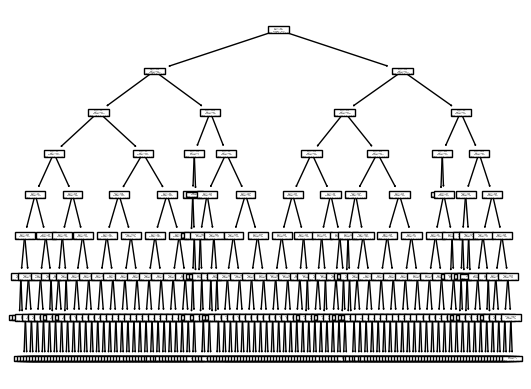

In [2]:
import numpy as np
import pandas as pd
import math

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import pathlib

csv_file = '/content/SeoulBikeData.csv'

dataframe = pd.read_csv(csv_file, encoding="latin")
dataframe['Date']=pd.to_datetime(dataframe['Date'],format="%d/%m/%Y")
dataframe['label_day_night']=dataframe['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))
dataframe['WeekDay']=dataframe["Date"].dt.day_name()
dataframe['Month']=dataframe['Date'].dt.month
dataframe=dataframe.drop(['Dew point temperature(°C)'],axis=1)


print(dataframe.head())





reporting={}
X_MultipleLinearRegression=dataframe.drop(['Rented Bike Count','Temperature(°C)','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=dataframe.iloc[:,1] #the target
X_train,X_test,y_train,y_test=train_test_split(X_MultipleLinearRegression,y,test_size=0.3, random_state=0)

#Decision Tree


scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)
decisionTree = DecisionTreeRegressor()
clf = DecisionTreeClassifier(random_state=0, max_depth=8)
model = clf.fit(X_MultipleLinearRegression, y)


param = {'max_depth' : [8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train_Scaled,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test_Scaled,y_test)
print('Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))
print('Test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))
print(bestDecisionTree_testScore)

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

tree.plot_tree(clf)
plt.show()


Info:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null 

<ipython-input-3-d412cb06e534>:28: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bike_df['Date']=pd.to_datetime(bike_df['Date'])


Epoch 1/40
614/614 [==============================] - 8s 4ms/step - loss: 0.4288 - accuracy: 0.7886
Epoch 2/40
614/614 [==============================] - 2s 4ms/step - loss: 0.3122 - accuracy: 0.8666
Epoch 3/40
614/614 [==============================] - 3s 5ms/step - loss: 0.2875 - accuracy: 0.8775
Epoch 4/40
614/614 [==============================] - 2s 3ms/step - loss: 0.2750 - accuracy: 0.8834
Epoch 5/40
614/614 [==============================] - 2s 3ms/step - loss: 0.2665 - accuracy: 0.8883
Epoch 6/40
614/614 [==============================] - 2s 4ms/step - loss: 0.2611 - accuracy: 0.8885
Epoch 7/40
614/614 [==============================] - 3s 4ms/step - loss: 0.2543 - accuracy: 0.8917
Epoch 8/40
614/614 [==============================] - 2s 3ms/step - loss: 0.2494 - accuracy: 0.8953
Epoch 9/40
614/614 [==============================] - 2s 3ms/step - loss: 0.2448 - accuracy: 0.8960
Epoch 10/40
614/614 [==============================] - 2s 3ms/step - loss: 0.2403 - accuracy: 0.8977

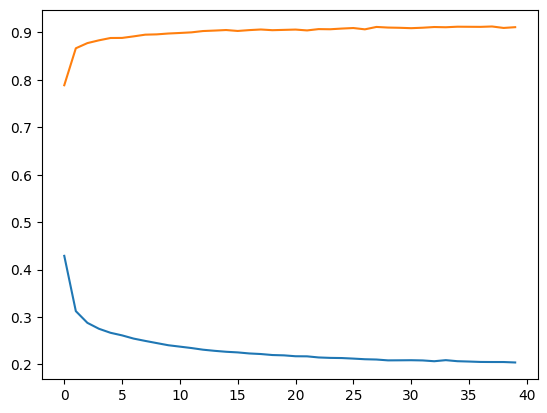

In [3]:

#Neural Network

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

csv_file = '/content/SeoulBikeData.csv'
bike_df = pd.read_csv(csv_file, encoding='cp1252')
print("Info:-")
bike_df.info()
print("Describe:-")
bike_df.describe()

threshold = bike_df['Rented Bike Count'].quantile(0.75)

bike_df["Rented_Bike_Count_Value"] = (bike_df['Rented Bike Count'] > threshold).astype(float)

bike_df['Date']=pd.to_datetime(bike_df['Date'])
from datetime import datetime
import datetime as dt

bike_df['Year']=bike_df['Date'].dt.year
bike_df['Month']=bike_df['Date'].dt.month
bike_df['Day']=bike_df['Date'].dt.day
bike_df['DayName']=bike_df['Date'].dt.day_name()
bike_df['Weekday'] = bike_df['DayName'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','DayName','Year'],axis=1)
bike_df = pd.get_dummies(bike_df, columns = ['Seasons',	'Holiday',	'Functioning Day'])

bike_df.head()

#DECLARE FEATURE VECTOR AND TARGET VARIABLE
X = bike_df.drop(columns=['Rented_Bike_Count_Value','Rented Bike Count'], axis=1)
y = bike_df['Rented_Bike_Count_Value']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print("X train Shape:", X_train.shape)
print("X test shape:", X_test.shape)

cols = X_train.columns
print("------Data Standardization------")
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(10, activation = 'relu', input_dim = 20))

model.add(Dense(10, activation = 'relu'))

model.add(Dense(1,  activation = 'sigmoid'))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



history = model.fit(X_train, y_train.values, batch_size = 10, epochs = 40)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])



